# Running Some Models on the T1D Data

### Some notes

**Files**:
- design_matrix.csv: actual data (N x 161532)
- dict_vectorizer.pickle: a DictVectorizer object mapping feature names to int
- encoded_dataset.pkl: ???
- encoding_details.yaml: type of encoding, example_ids and feature names
- labels.csv: labels for examples: age, diabetes, donor, HLA, sex (1586 x 5)
- normalizer.pkl: a Normalizer object (l1) used for ???

**Diabetes Labels**:
- T1D = 456
- FDR = 761
- SDR = 76
- OTHER = 68
- Ctl = 224
- NaN = 1

### Importing libraries

In [5]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

### Defining params: k-fold, models, and result file

In [2]:
k = 5
model_names = ['lasso', 'logisticregression', 'decisiontree', 'randomforest', 'adaboost']
output_file = 'models_accuracies.pkl'

### Defining function to create target labels 

In [3]:
def define_labels(y):
    labels = np.zeros_like(y,dtype='int')
    labels[y=='T1D'] = 1
    return labels    

### (Load tiny dataset to check the configuration)

### Load real T1D data

In [ ]:
X = pd.read_csv("design_matrix.csv").to_numpy()

df = pd.read_csv("labels.csv")
y = define_labels(df['Diabetes'].to_numpy())

print('Loaded data.')

### Run the k-fold experiment with the chosen models

In [5]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import AdaBoostClassifier as AB

from sklearn.model_selection import KFold
from sklearn import metrics 

kf = KFold(n_splits=k)

accuracies = {}
for n in model_names:
    accuracies[n] = []

for tr_idx, te_idx in kf.split(X):
    print('Running split...')
    X_tr, y_tr = X[tr_idx], y[tr_idx]
    X_te, y_te = X[te_idx], y[te_idx]
    
    models = [LR(penalty='l1',solver='saga'), LR(), DT(), RF(), AB()]
    for i,m in enumerate(models):
        print('Running model {0}'.format(model_names[i]))
        m.fit(X_tr,y_tr)
        yhat = m.predict(X_te)
        accuracies[model_names[i]].append(metrics.accuracy_score(y_te,yhat))

joblib.dump(accuracies,output_file)

Running split...
Running model lasso
Running model logisticregression
Running model decisiontree
Running model randomforest
Running model adaboost
Running split...
Running model lasso
Running model logisticregression
Running model decisiontree
Running model randomforest
Running model adaboost
Running split...
Running model lasso
Running model logisticregression
Running model decisiontree
Running model randomforest
Running model adaboost
Running split...
Running model lasso
Running model logisticregression
Running model decisiontree
Running model randomforest
Running model adaboost
Running split...
Running model lasso
Running model logisticregression
Running model decisiontree
Running model randomforest
Running model adaboost


['models_accuracies.pkl']

### Plotting the accuracies

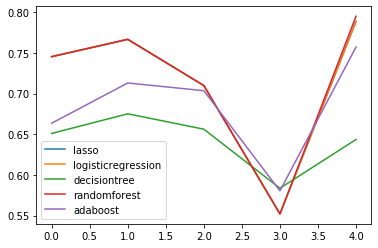

In [6]:
accs = joblib.load('results/models_accuracies.pkle')

k=5
for m in accs:
    plt.plot(np.arange(k),accs[m], label=m)
plt.legend()